In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from pathlib import Path
from matplotlib import pyplot as plt

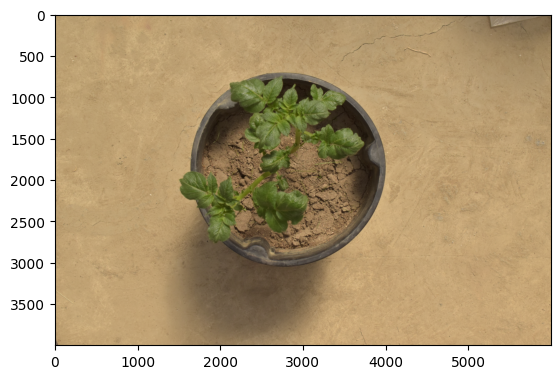

In [2]:
# 读取图像
directory_path = Path(r'.\images\Canon\01 - Nov - 23\JPG')
image_path = directory_path / 'DSC_0537 (Pot 2) .JPG'
image = cv2.imread(str(image_path))
# bgr -> rgb
image_plt = image[:,:,::-1]
plt.imshow(image_plt)
# cv2.imshow('image', image)


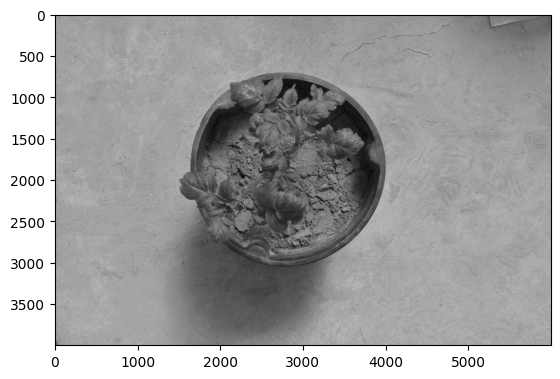

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# cv2.imshow('gray', gray)
plt.imshow(gray, cmap='gray')

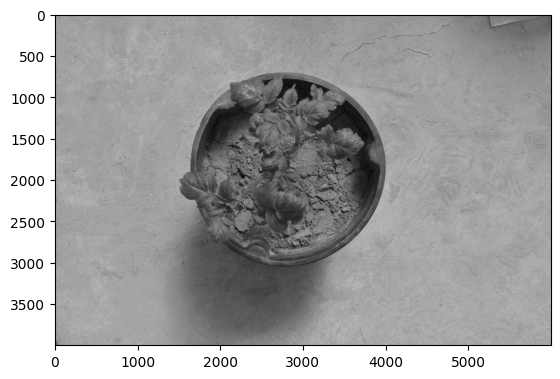

In [4]:
# 应用高斯模糊降低噪声
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
blurred = gray
plt.imshow(blurred, cmap='gray')

In [5]:
# 应用Canny边缘检测
edges = cv2.Canny(blurred, threshold1=100, threshold2=200)

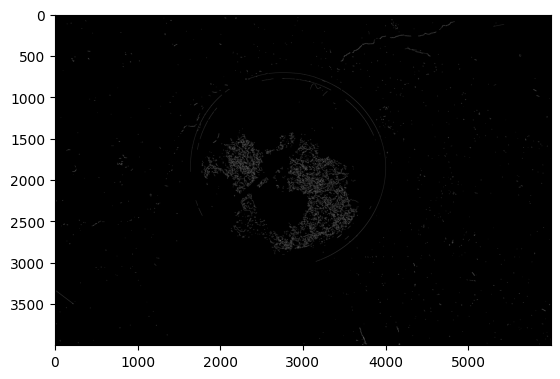

In [6]:
plt.imshow(edges, cmap='gray')

In [7]:
# 根据边缘提取掩模
# 首先找到轮廓
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 创建一个全黑的图像用来绘制叶片
leaf_mask = np.zeros_like(gray)

for i in range(len(contours)):
    hull = cv2.convexHull(contours[i])
    cv2.drawContours(leaf_mask, [hull], -1, (255), thickness=cv2.FILLED)

# 将轮廓填充到掩模图像中
# cv2.drawContours(leaf_mask, contours, -1, (255), thickness=cv2.FILLED)

In [8]:
all_contour_points = contours[0]
for i in range(1, len(contours)):
    all_contour_points = np.concatenate((all_contour_points, contours[i]), axis=0)

print(all_contour_points.shape)
all_contour_points = all_contour_points.reshape(-1, 2)
k = 9
kmeans = KMeans(n_clusters=k)
kmeans.fit(all_contour_points)

(116412, 1, 2)


KMeans(n_clusters=9)

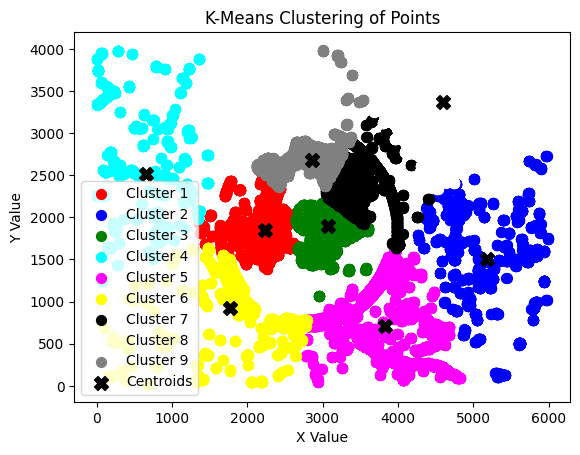

In [9]:
# 获取聚类的结果
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
colors = ['red','blue','green','cyan','magenta','yellow','black','white','grey',
    'orange','purple','brown','pink','lime','olive','chocolate','gold','teal','coral','navy']  # 可以根据需要增加更多颜色

for i in range(k):
    # 提取属于当前聚类的数据点
    cluster_data = all_contour_points[labels == i]
    # 绘制数据点
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], s=50, c=colors[i], label=f'Cluster {i+1}')

# 绘制聚类中心点
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='black', marker='X', label='Centroids')

plt.title('K-Means Clustering of Points')
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.legend()
plt.show()

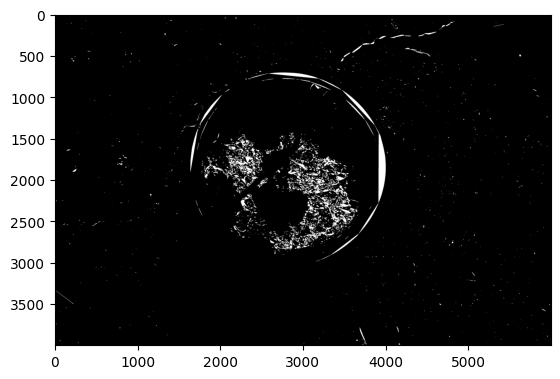

In [10]:
plt.imshow(leaf_mask, cmap='gray')

(4000, 6000, 3)
(4000, 6000)
uint8


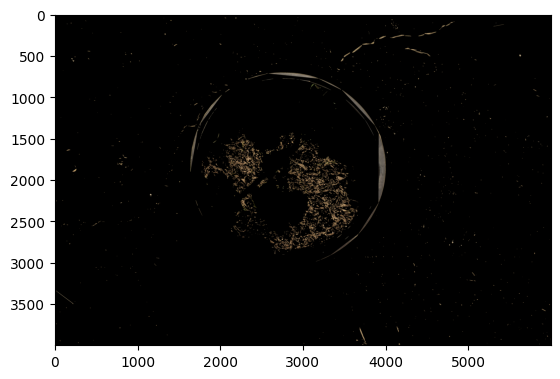

: 

In [12]:
# 使用掩模提取原图像中的叶片部分
leaf = cv2.bitwise_and(image, image, mask=leaf_mask)
print(image.shape)
print(leaf_mask.shape)
print(leaf_mask.dtype)
# 显示叶片
plt.imshow(leaf[:,:,::-1])
# cv2.imshow('Leaf', leaf)
# cv2.waitKey(0)
# cv2.destroyAllWindows()